In [19]:
import pandas as pd
import numpy as np
from data_loader import get_reviews
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

N_FEATURES = 17
DATA_PATH = pathlib.Path('data')

In [2]:
path = DATA_PATH / 'matched_beer_data/ratings_with_text_ba.txt'

df_beer = get_reviews(path,N_FEATURES)
df_beer.head()


,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
0,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1360753200,brewdude1982,brewdude1982.691169,4.25,4.5,3.25,3.75,3.75,3.91,This was a 12 oz bottle poured into a snifter....,True
1,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1357729200,AgentMunky,agentmunky.409755,4.0,3.75,3.5,3.5,3.75,3.64,Poured from a 12 ounce bottle into a pilsner g...,True
2,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1353150000,ferrari29,ferrari29.320392,3.0,3.5,2.5,2.5,2.5,2.77,Beer poured from bottle into a Nonic shaped pi...,True
3,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1342260000,OtherShoe2,othershoe2.233642,4.0,3.5,4.0,3.5,4.0,3.68,Pours a rich brownish red with some chill haze...,True
4,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1335607200,brentk56,brentk56.6284,4.5,3.0,3.5,2.5,2.5,2.84,Appearance: These Strangford Lough beers pour ...,True


In [3]:
df_beer['beer_name'].value_counts()

beer_name
Trappistes Rochefort 10           2968
Brooklyn Black Chocolate Stout    2861
Delirium Tremens                  1773
AleSmith Speedway Stout           1761
Titan IPA                         1513
                                  ... 
New World Pale                       1
Triple 'S'                           1
U.P.A.                               1
54-46                                1
Blackberry Stout                     1
Name: count, Length: 26448, dtype: int64

In [4]:
# Let's load from BeerAdvocate, RateBeer and matched_beer_data the users.csv

users_ba = pd.read_csv(DATA_PATH / 'BeerAdvocate/users.csv')
users_ma = pd.read_csv(DATA_PATH / 'matched_beer_data/users.csv')
users_rb = pd.read_csv(DATA_PATH / 'RateBeer/users.csv')

In [5]:
# Just display amount of rows and columns

print("BeerAdvocate shape: {} rows, {} columns".format(*users_ba.shape))
print("Matched shape: {} rows, {} columns".format(*users_ma.shape))
print("RateBeer shape: {} rows, {} columns".format(*users_rb.shape))

print("Columns of BA: {}".format(users_ba.columns))
print("Columns of MA: {}".format(users_ma.columns))
print("Columns of RB: {}".format(users_rb.columns))

BeerAdvocate shape: 153704 rows, 6 columns
Matched shape: 3021 rows, 13 columns
RateBeer shape: 70174 rows, 5 columns
Columns of BA: Index(['nbr_ratings', 'nbr_reviews', 'user_id', 'user_name', 'joined',
       'location'],
      dtype='object')
Columns of MA: Index(['ba', 'ba.1', 'ba.2', 'ba.3', 'ba.4', 'ba.5', 'ba.6', 'rb', 'rb.1',
       'rb.2', 'rb.3', 'rb.4', 'rb.5'],
      dtype='object')
Columns of RB: Index(['nbr_ratings', 'user_id', 'user_name', 'joined', 'location'], dtype='object')


In [6]:
users_ba.head()

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland


In [7]:
users_ma.head()

,ba,ba.1,ba.2,ba.3,ba.4,ba.5,ba.6,rb,rb.1,rb.2,rb.3,rb.4,rb.5
0,joined,location,nbr_ratings,nbr_reviews,user_id,user_name,user_name_lower,joined,location,nbr_ratings,user_id,user_name,user_name_lower
1,1220868000.0,Germany,6,6,erzengel.248045,Erzengel,erzengel,1224324000.0,Germany,8781,83106,Erzengel,erzengel
2,1348394400.0,"United States, Virginia",1,1,gendv138.695700,GenDV138,gendv138,1385722800.0,"United States, Virginia",6240,290599,GenDV138,gendv138
3,1207303200.0,"United States, Washington",3,3,nimbleprop.208928,nimbleprop,nimbleprop,1150797600.0,"United States, Washington",7452,38859,nimbleprop,nimbleprop
4,1322737200.0,Estonia,11,0,visionthing.639993,visionthing,visionthing,1242986400.0,Estonia,5462,91324,visionthing,visionthing


=> matched users always have the same user_name in ba and rb => we can get rid of one column

=> if location NAN then joined NAN

In [8]:
# See how many users are in common between the two datasets BA and RB
users_ba_rb = pd.merge(users_ba, users_rb, on=['user_name'], how='inner')

users_ba_rb.head()

,nbr_ratings_x,nbr_reviews,user_id_x,user_name,joined_x,location_x,nbr_ratings_y,user_id_y,joined_y,location_y
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington",3,101495,1.265800e+09,"United States, Washington"
1,1866,23,rochefortchris.697017,RochefortChris,1.349172e+09,"United States, North Carolina",8,213410,1.345975e+09,"United States, South Carolina"
2,6306,6306,brentk56.6284,brentk56,1.084442e+09,"United States, North Carolina",1,26838,1.125742e+09,"United States, North Carolina"
3,6260,4734,emerge077.17949,emerge077,1.113646e+09,"United States, Illinois",40,46216,1.165576e+09,"United States, Illinois"
4,1851,10,buckyp.435592,buckyp,1.267960e+09,"United States, South Carolina",20,68888,1.201864e+09,"United States, Georgia"


In [9]:
# Remove if missing data
users_ba_rb = users_ba_rb.dropna()

print("Shape of filtered BA and RB: {} rows, {} columns".format(*users_ba_rb.shape))

Shape of filtered BA and RB: 3139 rows, 10 columns


In [10]:
# Remove lines from users_ba_rb if the user_name is in users_ma["ba.6"]
names_in_ma = users_ma["ba.6"].tolist()[1:]

filtered_users_ba_rb = users_ba_rb.copy()
filtered_users_ba_rb["user_name"] = filtered_users_ba_rb["user_name"].str.lower()
filtered_users_ba_rb = filtered_users_ba_rb[~filtered_users_ba_rb["user_name"].isin(names_in_ma)]

print(filtered_users_ba_rb.shape)

(660, 10)


to replicated matched dataset, we did inner join + removed NANs but we have more in our filtered dataset than the matched dataset. We try to udnerstand why.

-> 542 lines in matched but not in filtered

-> 600 lines in filtered but not in matched

In [11]:
# remove lines from users_ma if the user_name is in users_ba_rb

names_filter = users_ba["user_name"].to_list()
names_filter = [str(name).lower() for name in names_filter]

filtered_users_ma = users_ma[~users_ma["ba.6"].isin(names_filter)]
print(filtered_users_ma.shape)

(1, 13)


=> all users in matched are in users_rb and users_ba 

In [12]:
def get_reviews(file, n_features):
    
    with open(file, "r", encoding="utf8") as f:
        lines = f.readlines()
    lines_without_breaks = [line[:-1] for line in lines if line != "\n"]
    data = [line[line.find(": ") + 2 :] for line in lines_without_breaks]
    data = np.array(data, dtype="object")
    features = [line[0 : line.find(": ")] for line in lines[:n_features]]
    reviews = data.reshape((-1, n_features))
    reviews_df = pd.DataFrame(reviews, columns=features)
    return reviews_df

Upon looking through the data, we notice that the different text files have a different number of attributes which we give to the `get_reviews` function as `n_features`

In [13]:
# make dataframes of the text files 

ratings_ba = get_reviews(DATA_PATH / 'matched_beer_data/ratings_ba.txt', 17)
ratings_rb = get_reviews(DATA_PATH / 'matched_beer_data/ratings_rb.txt', 16)
ratings_ba_text = get_reviews(DATA_PATH / 'matched_beer_data/ratings_with_text_ba.txt', 17)
ratings_rb_text = get_reviews(DATA_PATH / 'matched_beer_data/ratings_with_text_rb.txt', 16)

We now want to understand the difference with these datasets:

1. what is the additional columns in ba: `review` which is a bool
2. what is the difference between the datasets with and without text:

Our hypothesis is that the ratings files from the `matched_beer_data` were made from the matched users. The files from BeerAdvocate and RateBeer are very large so we will try not to work with them.

In [14]:
# comparison of dataframes sizes

print("Shape of BA: {} rows, {} columns".format(*ratings_ba.shape))
print("Shape of RB: {} rows, {} columns".format(*ratings_rb.shape))
print("Shape of BA with text: {} rows, {} columns".format(*ratings_ba_text.shape))
print("Shape of RB with text: {} rows, {} columns".format(*ratings_rb_text.shape))

Shape of BA: 955968 rows, 17 columns
Shape of RB: 1020638 rows, 16 columns
Shape of BA with text: 289025 rows, 17 columns
Shape of RB with text: 1020599 rows, 16 columns


In [15]:
# remove lines from users_ma if the user_name is in ratings_ba or ratings_rb

names_filter_ba = ratings_ba["user_name"].to_list()
names_filter_ba = [str(name).lower() for name in names_filter]
names_filter_rb = ratings_rb["user_name"].to_list()
names_filter_rb = [str(name).lower() for name in names_filter]

filtered_users_ba = users_ma[~users_ma["ba.6"].isin(names_filter_ba)]
filtered_users_rb = users_ma[~users_ma["ba.6"].isin(names_filter_rb)]

print("Size of unfiltered users.ma: {}".format(users_ma.shape))
print("Size of users.ma filtered with ba: {}".format(filtered_users_ba.shape))
print("Size of users.ma filtered with rb: {}".format(filtered_users_rb.shape))

Size of unfiltered users.ma: (3021, 13)
Size of users.ma filtered with ba: (1, 13)
Size of users.ma filtered with rb: (1, 13)


=> if users_ma has users from `ratings_ba` or `ratings_rb`, then they are in both datasets

In [16]:
# remove lines from ratings_ba if the user_name is in ratings_rb

filtered_ba = ratings_ba[~ratings_ba["user_name"].isin(names_filter_rb)]
print(filtered_ba.shape)

# faire differemment: recuperer list de unique users dans ratings_rb et faire un isin sur ratings_ba

(498657, 17)


=> however the `ratings_ba` and `ratings_rb` have a very different list of user_names

In [17]:
# See how many users are in common between the ratings_ba and ratings_rb datasets

ratings_ba_rb = pd.merge(ratings_ba, ratings_rb, on=['user_name'], how='inner')
ratings_ba_rb = ratings_ba_rb.dropna()

print("Shape of filtered BA and RB: {} rows, {} columns".format(*ratings_ba_rb.shape))

Shape of filtered BA and RB: 12751036 rows, 32 columns


We not want to understand the similarities between the `ratings.txt` datasets from RateBeer and BeerAdvocate and the matched files (`ratings_ba.txt` and `ratings_rb.txt`). We therefore load the full datasets from RB and BA, then extract a sample for each column and compare it to the matched data through plots and significance testing (ie. t-test)

In [18]:
# get full dataset of ratings RB

full_ratings_rb = get_reviews(DATA_PATH / 'RateBeer/ratings.txt', 16)

In [25]:
full_ratings_rb.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,1461664800,Manslow,175852,2,4,2,4,8,2.00,"Puszka 0,33l dzięki Christoph . Kolor jasnozło..."
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1487329200,MAGICuenca91,442761,2,3,2,4,8,1.90,Cerveza pale lager gabonesa. MÃ¡s floja que la...
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1466762400,Sibarh,288889,3,3,2,3,5,1.60,"Kolor- złoty, klarowny. Piana - drobna, średni..."
3,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1451646000,fombe89,250510,4,3,1,2,5,1.50,"Botella, de GabÃ³n regalo familiar.31/01/2015C..."
4,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1445594400,kevnic2008,122778,2,4,2,4,7,1.90,Many thanks for this beer to Erzengel. Pours l...


In [55]:
# Randomly sample a column from the full rb dataset equal to the length of the column in the matched file

def make_sample(full_df, col_name):
    col_full = full_ratings_rb[col_name]
    col_rb = ratings_rb[col_name]
    sample = col_full.sample(len(col_rb))
    return sample 

# plot the distribution of the column from the full rb dataset and the matched rb dataset

def make_hist(sample, col_rb):
    plt.hist(sample, bins=10, alpha=0.5, label='Full')
    plt.hist(col_rb, bins=10, alpha=0.5, label='RB')
    plt.legend(loc='upper right')
    plt.show()

def make_boxplot(sample, col_rb):
    sns.boxplot(data=[sample, col_rb])
    plt.show()

def make_plots(sample, col_rb, sample_title, col_title):
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey = False, sharex = False)

    ax[0].hist(sample, bins=10, alpha=0.5, label='Full')
    ax[0].hist(col_rb, bins=10, alpha=0.5, label='RB')
    ax[0].legend(loc='upper right')
    ax[0].set_title(sample_title)
    
    ax[1] = sns.boxplot(data=[sample, col_rb], ax=ax[1])
    ax[1].set_title(col_title)
    plt.show()

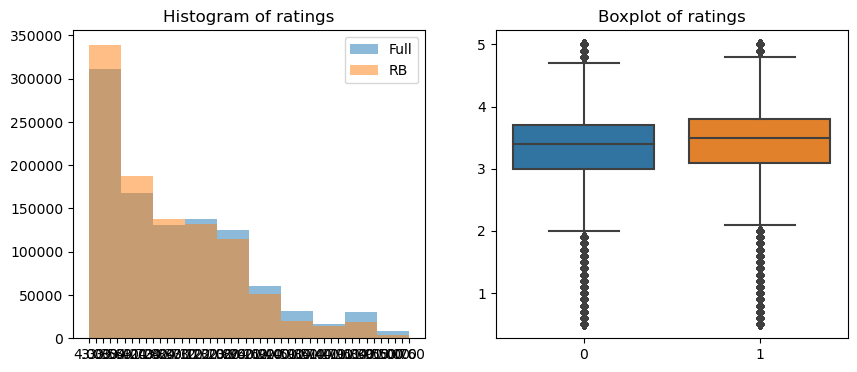

In [56]:
# Compare the ratings

rating_col_full_sample = make_sample(full_ratings_rb, "rating")
rating_col_rb = ratings_rb["rating"]
make_plots(rating_col_full_sample, rating_col_rb, "Histogram of ratings", "Boxplot of ratings")

In [64]:
import scipy.stats as stats

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(rating_col_full_sample.astype(float), rating_col_rb.astype(float))

print("The t-statistic is {:.2f}".format(t_statistic))
print("The p-value is {:.2e}".format(p_value))

if p_value < 0.05:
    print("The null hypothesis is rejected, the mean rating between the sample and the matched rb is different")
else:
    print("The null hypothesis is accepted, the difference between the rating for the sample and matched rb is not statistically significant")

The t-statistic is -123.24
The p-value is 0.00e+00
The null hypothesis is rejected, the mean rating between the sample and the matched rb is different


In [63]:
from scipy.stats import kstest

res1 = kstest(rating_col_full_sample.astype(float), 'norm')
print(res1)

res2 = kstest(rating_col_rb.astype(float), 'norm')
print(res2)

KstestResult(statistic=0.9295634571929671, pvalue=0.0, statistic_location=1.9, statistic_sign=-1)
KstestResult(statistic=0.955170541199401, pvalue=0.0, statistic_location=2.0, statistic_sign=-1)


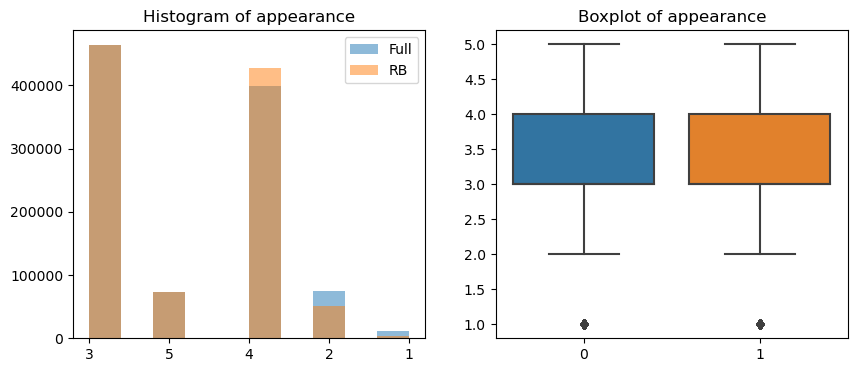

In [57]:
# Compare the appearance

app_col_full_sample = make_sample(full_ratings_rb, "appearance")
app_col_rb = ratings_rb["appearance"]
make_plots(app_col_full_sample, app_col_rb, "Histogram of appearance", "Boxplot of appearance")

In [65]:
# Perform the t-test
t_statistic_app, p_value_app = stats.ttest_ind(app_col_full_sample.astype(float), app_col_rb.astype(float))

print("The t-statistic is {:.2f}".format(t_statistic_app))
print("The p-value is {:.2e}".format(p_value_app))

if p_value < 0.05:
    print("The null hypothesis is rejected, the mean appearance rating between the sample and the matched rb is different")
else:
    print("The null hypothesis is accepted, the difference between the appearance rating for the sample and matched rb is not statistically significant")

The t-statistic is -61.85
The p-value is 0.00e+00
The null hypothesis is rejected, the mean appearance rating between the sample and the matched rb is different


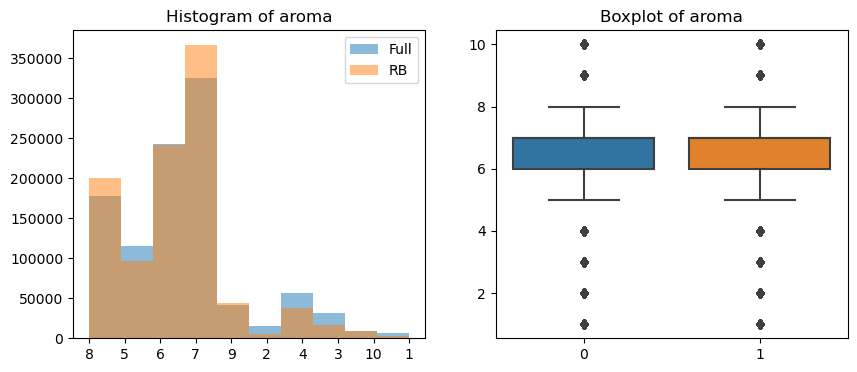

In [58]:
# Compare the aromas

aroma_col_full_sample = make_sample(full_ratings_rb, "aroma")
aroma_col_rb = ratings_rb["aroma"]
make_plots(aroma_col_full_sample, aroma_col_rb, "Histogram of aroma", "Boxplot of aroma")

In [66]:
# Perform the t-test for aromas
t_statistic_aroma, p_value_aroma = stats.ttest_ind(aroma_col_full_sample.astype(float), aroma_col_rb.astype(float))

print("The t-statistic is {:.2f}".format(t_statistic_aroma))
print("The p-value is {:.2e}".format(p_value_aroma))

if p_value < 0.05:
    print("The null hypothesis is rejected, the mean aroma rating between the sample and the matched rb is different")
else:
    print("The null hypothesis is accepted, the difference between the aroma rating for the sample and matched rb is not statistically significant")

The t-statistic is -123.13
The p-value is 0.00e+00
The null hypothesis is rejected, the mean aroma rating between the sample and the matched rb is different


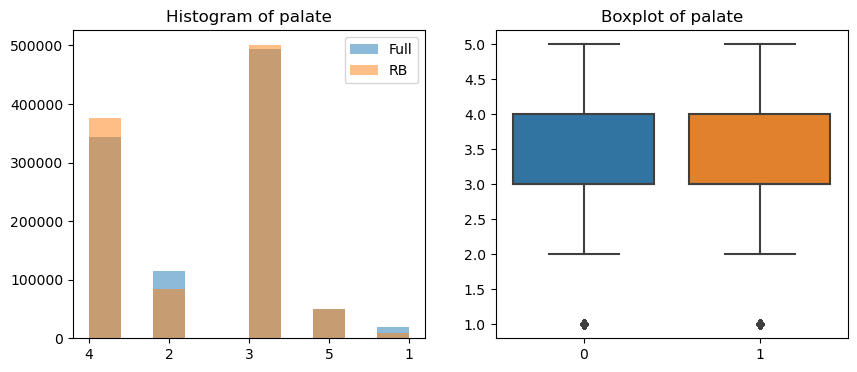

In [59]:
# Compare the palate ratings

palate_col_full_sample = make_sample(full_ratings_rb, "palate")
palate_col_rb = ratings_rb["palate"]
make_plots(palate_col_full_sample, palate_col_rb, "Histogram of palate", "Boxplot of palate")

In [67]:
# Perform the t-test for aromas
t_statistic_pal, p_value_pal = stats.ttest_ind(palate_col_full_sample.astype(float), palate_col_rb.astype(float))

print("The t-statistic is {:.2f}".format(t_statistic_pal))
print("The p-value is {:.2e}".format(p_value_pal))

if p_value < 0.05:
    print("The null hypothesis is rejected, the mean palate rating between the sample and the matched rb is different")
else:
    print("The null hypothesis is accepted, the difference between the palate rating for the sample and matched rb is not statistically significant")

The t-statistic is -78.94
The p-value is 0.00e+00
The null hypothesis is rejected, the mean palate rating between the sample and the matched rb is different


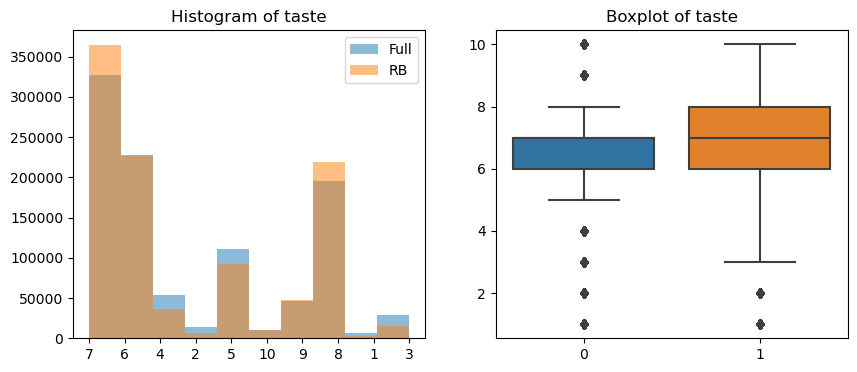

In [60]:
# Compare the taste ratings

taste_col_full_sample = make_sample(full_ratings_rb, "taste")
taste_col_rb = ratings_rb["taste"]
make_plots(taste_col_full_sample, taste_col_rb, "Histogram of taste", "Boxplot of taste")

In [68]:
# Perform the t-test for aromas
t_statistic_taste, p_value_taste = stats.ttest_ind(taste_col_full_sample.astype(float), taste_col_rb.astype(float))

print("The t-statistic is {:.2f}".format(t_statistic_taste))
print("The p-value is {:.2e}".format(p_value_taste))

if p_value < 0.05:
    print("The null hypothesis is rejected, the mean taste rating between the sample and the matched rb is different")
else:
    print("The null hypothesis is accepted, the difference between the taste rating for the sample and matched rb is not statistically significant")

The t-statistic is -111.17
The p-value is 0.00e+00
The null hypothesis is rejected, the mean taste rating between the sample and the matched rb is different


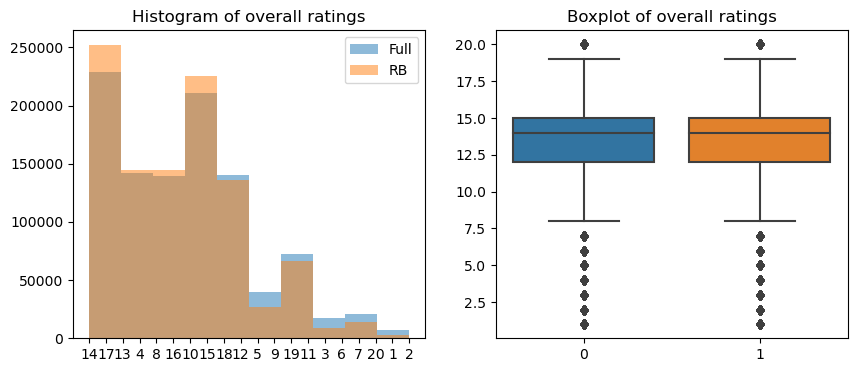

In [61]:
# Compare the overall ratings

overall_col_full_sample = make_sample(full_ratings_rb, "overall")
overall_col_rb = ratings_rb["overall"]
make_plots(overall_col_full_sample, overall_col_rb, "Histogram of overall ratings", "Boxplot of overall ratings")

In [69]:
# Perform the t-test for aromas
t_statistic_overall, p_value_overall = stats.ttest_ind(overall_col_full_sample.astype(float), overall_col_rb.astype(float))

print("The t-statistic is {:.2f}".format(t_statistic_overall))
print("The p-value is {:.2e}".format(p_value_overall))

if p_value < 0.05:
    print("The null hypothesis is rejected, the mean overall rating between the sample and the matched rb is different")
else:
    print("The null hypothesis is accepted, the difference between the overall rating for the sample and matched rb is not statistically significant")

The t-statistic is -118.73
The p-value is 0.00e+00
The null hypothesis is rejected, the mean overall rating between the sample and the matched rb is different
